In [13]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import library sklearn, numpy, matplotlib, pandas

In [14]:
from google.colab import files
uploaded = files.upload()
# get data

Saving loan approval.csv to loan approval (1).csv


In [15]:
df = pd. read_csv("/content/loan approval.csv")
df['Status'] = df['Status'].map({'Y': 1, 'N': 0})
# read and set new status

df.head()
#show data

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,0
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,0
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,NaN,Rural,0
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,0
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,1


In [16]:
df.columns # show column

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Income(dollar)', 'Coapplicant', 'Loan_Amount', 'Term(month)',
       'loan_History', 'Area', 'Status'],
      dtype='object')

In [17]:
df.describe()  # show detail

,Income(dollar),Loan_Amount,Term(month),loan_History,Status
count,6.140000e+02,6.140000e+02,600.00000,564.000000,614.000000
mean,7.024705e+05,1.414104e+07,342.00000,0.842199,0.687296
std,6.458664e+05,8.815682e+06,65.12041,0.364878,0.463973
min,1.442000e+05,0.000000e+00,12.00000,0.000000,0.000000
25%,4.166000e+05,9.800000e+06,360.00000,1.000000,0.000000
50%,5.416500e+05,1.250000e+07,360.00000,1.000000,1.000000
75%,7.521750e+05,1.647500e+07,360.00000,1.000000,1.000000
max,8.100000e+06,7.000000e+07,480.00000,1.000000,1.000000


<Axes: xlabel='Income(dollar)', ylabel='Loan_Amount'>

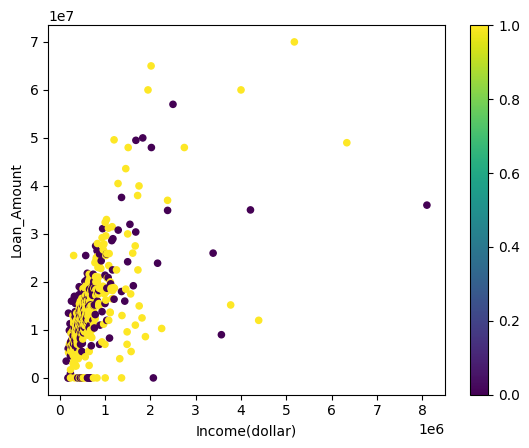

In [18]:
df.plot(kind='scatter', x='Income(dollar)', y='Loan_Amount', c=df['Status'], cmap=plt.cm.viridis) # show graph

In [19]:
y = df['Status'] # set y for train
X = df.drop(columns=['Status','Gender','Married','Dependents','Education','Self_Employed','Coapplicant','Term(month)','loan_History','Area']) # drop status and unimportant information

scaler = StandardScaler() # ตั้งค่าสเกล

X_scaled = scaler.fit_transform(X)  # เอาสเกลใส่ตัวแปล
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, train_size=0.80, random_state=101) # จำแนกข้อมูล

In [20]:
X_train # print ข้อมูลสำหรับ train

array([[-1.28723587e-01, -5.00700815e-02],
       [ 2.04671806e+00,  3.84389569e+00],
       [-1.20045993e-01, -1.52244110e-01],
       [-2.98246570e-01, -5.83645566e-01],
       [-6.50773798e-01, -5.38234887e-01],
       [-5.84917063e-01,  3.24568025e-01],
       [-2.27276254e-01,  6.76500791e-01],
       [ 1.17121088e+00,  3.34437821e+00],
       [-8.68851904e-02,  5.06210743e-01],
       [-5.03564626e-01, -3.56592168e-01],
       [-2.87864450e-01, -3.11181489e-01],
       [ 1.49801524e+00, -3.56592168e-01],
       [-3.13742273e-01, -4.36060858e-01],
       [ 2.28607309e-01,  3.92684044e-01],
       [-4.96746517e-01, -4.24708188e-01],
       [-5.20764856e-01, -4.58766197e-01],
       [ 1.02472292e-01,  1.20219967e-01],
       [-3.26603705e-01, -1.29538771e-01],
       [ 1.02663598e+00,  4.38094724e-01],
       [-3.56665368e-01, -6.85819595e-01],
       [-3.51241872e-01,  1.88335986e-01],
       [-1.98144333e-01,  1.28954496e+00],
       [ 2.02884443e-01,  4.38094724e-01],
       [-3.

In [21]:
# train แบบ linear
linear = svm.SVC(kernel='linear', C=2)
linear.fit(X_train, y_train)

# train แบบ polynomial
poly = svm.SVC(kernel='poly', degree=4, C=20)
poly.fit(X_train, y_train)

SVC(C=20, degree=4, kernel='poly')

In [22]:
# print accuracy linear
print("Train set accuracy = " + str(linear.score(X_train, y_train)))
print("Test set accuracy = " + str(linear.score(X_test, y_test)))

Train set accuracy = 0.6883910386965377
Test set accuracy = 0.6829268292682927


In [23]:
# print accuracy polynomial
print("Train set accuracy = " + str(poly.score(X_train, y_train)))
print("Test set accuracy = " + str(poly.score(X_test, y_test)))

Train set accuracy = 0.6945010183299389
Test set accuracy = 0.6585365853658537


In [24]:
poly_pred = poly.predict(X_test)
comparison_df = pd.DataFrame({'y_test': y_test, 'poly_pred': poly_pred, 'match': y_test == poly_pred})
print(comparison_df)

     y_test  poly_pred  match
216       0          1  False
55        1          1   True
593       0          1  False
438       0          1  False
351       1          1   True
..      ...        ...    ...
437       1          1   True
283       1          1   True
2         0          1  False
355       1          1   True
353       1          1   True

[123 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


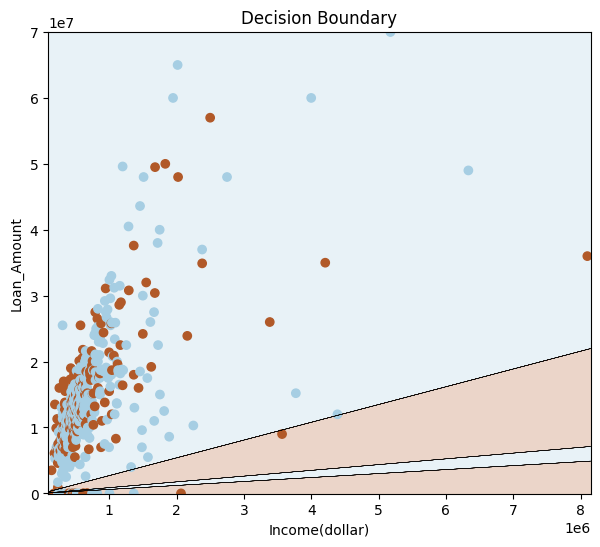

In [25]:
def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 5000  # Boundary lines' resolution
    x_min, x_max = X['Income(dollar)'].min() - 10*h, X['Income(dollar)'].max() + 10*h
    y_min, y_max = X['Loan_Amount'].min() - 10*h, X['Loan_Amount'].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # use column names for prediction to avoid dimension issues
    Z = clf.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Income(dollar)', 'Loan_Amount']))

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines

    # Plot the training data points
    plt.scatter(X['Income(dollar)'], X['Loan_Amount'], c=y, cmap=cmap)
    plt.xlabel('Income(dollar)')
    plt.ylabel('Loan_Amount')
    plt.title('Decision Boundary')
    plt.show()


# Call with the training data and polynomial model
plot_decision_boundary(poly, X, y)


In [26]:
conf_matrix_polySVM = confusion_matrix(y_test, poly_pred)
precision_polySVM = precision_score(y_test, poly_pred, average="macro")
recall_polySVM = recall_score(y_test, poly_pred, average="macro")
f1_polySVM = f1_score(y_test, poly_pred, average="macro")

print("Polynomial SVM efficiency \n")
print("Precision: ", precision_polySVM)
print("Recall: ", recall_polySVM)
print("F1-Score: ", f1_polySVM)

print("Confusion Matrix:\n", conf_matrix_polySVM)


Polynomial SVM efficiency 

Precision:  0.4389830508474576
Recall:  0.489010989010989
F1-Score:  0.41876687668766877
Confusion Matrix:
 [[ 1 38]
 [ 4 80]]


In [27]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(linear, filename)

['finalized_model.sav']